<p><img alt="udeA logo" height="120px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="10px" vspace="0px" style="width:107px;height:152px;"></p>

# <center> <font color='0B5345'>Homework 1.4:</font> </center>


## TASK: T1

<p align="justify"> <font face="Verdana" size='2'>
Build the dictionary ADT class to provide operations for storing records, finding records, and removing records from the collection. Use five-letter keys from the alphabet = <em>{A,B,C,D,E,F,G,H,I}</em>

<center><img src="https://github.com/freddyduitama/images/blob/master/ADT.png?raw=true" height="200" width="350"></center>
<caption><center><font color='0B5345'> <u> <b>Figure 1:</b><br> </u>Dictionay ADT</font></center></caption>

</p>

<b>Key issues:</b>
<ul> <font face="Verdana" size='2'>
<li>From equation <b>(13)</b>, for $m$ keys and $n$ possibles buckets, the probability that all $m$ keys are thrown in different buckets is  equal to $e^\frac {- m^2}{2n}$.<br> </li>
<li>Suppose that $\frac {1}{a}$ is the probability that $m$ keys be thrown to $n$ different buckets without collisions. To find the number of keys, you can use the expression $m  = \sqrt {2n \ ln \ a }$   </li>
<li>Probability ($\exists$ one bucket with at least $k$ keys $) \le n (\frac {e}{k})^k $. <br>
<a>Hint:</a> when $m=n$ Probability ($\exists$ one bucket with at least $k$ keys)  $ \le  \frac {1}{n} $ when $ k \ge \frac {3 \ ln \ n}{ln \ ln\ n}$ and  for $n$ sufficiently large. </li>
<li><font color='0B5345'><b>The worst case:</b> </font>Having $m=n$, <b> the query time</b> to find an specific key in the dictionary $D$    will be $\lt \frac {3 \ ln \ n}{ln \ ln\ n}$ with probability $ \ge (1 - \frac{1}{n})$.</li>
</ul>
<ul>
<font face="Verdana" size='2'>
<b>Hints: </b>
<li>A recommeded video about implementation issues <a href="https://www.youtube.com/watch?v=kpfPpbfwrzs">Here </a> </li>
<li>To know details about how to manage the collisions <a href="https://drive.google.com/file/d/1xJGozhhrxR14dnW0jarFjZ_IaUsVVoXJ/view?usp=sharing">click </a> </li>
</ul>

###  I. Set environment


In [ ]:
#you must run this code to enable the grader

!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [ ]:
# sig in. Please don't modify this code.
# init.course_id = "bigdata.v2"
init.course_id = "LOGICA_3.v1"
import inspect
from local.lib.rlxmoocapi import session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L01.04", varname="student");

logging in as estiven.carmona@udea.edu.co... please wait
using course session LOGICA_3.v1::2023.2
success!! you are logged in


### II. Add your solution

In [ ]:
 !pip install bitmap
 !pip install primesieve==2.3.0

In [ ]:
# define  an ADT and its methods

def my_solution_t1(capacity):                    # function to run in the grader
  import numpy as np
  from bitmap import BitMap
  from primesieve import n_primes
  import hashlib

  class HashFamily:

    def __init__(self, capacity):
        buckets =  n_primes(1, capacity+1)[0]                                                             # Bucket number ->  use primesieve library to find the next prime greater than capacity
        self._table = [None] * buckets
        self._a = np.random.randint(1, buckets-1)                               # variable a
        self._b = np.random.randint(0, buckets-1)                               # variable b
        self._buckets = buckets
        self._n =  0                                                            # input size
        self._busy_buckets = 0                                                  # number of busy buckets
        self._greatest_bucket = [0,0]                                           # bucket having the largest list, len of the list

    def get_hash(self, key):
          mapped_key = self.map_the_key(key)                                              # map the key
          return (self._a * mapped_key + self._b) % self._buckets, mapped_key             # return bucket number, and mapped key. Both int

    def get_function(self):
      return self._a,self._b,self._buckets                           # return constant a,b and bucket number.

    #  key must be a String. Use map_the_key to represent the key as a number.
    #  Each entry in ADT must be a  tuple (key, mapped_key) , even when collision occurs.
    def set_item(self,key):
          ### START YOUR CODE HERE ###
          bucket, mapped_key = self.get_hash(key)
          if self._table[bucket] is None:
            self._table[bucket] = []
            self._busy_buckets += 1                                                               # Each bucket uses a linked list.
          self._table[bucket].append((key, mapped_key))                                 # It could store several times the same key. It does not matter collisions.
          if len(self._table[bucket]) > self._greatest_bucket[1]:
            self._greatest_bucket = [bucket, len(self._table[bucket])]                             # ask if the len of current list is greater than the len of the keeped list in self._greatest_bucket
          ### END YOUR CODE HERE ###
          self._n =  self._n + 1
          return bucket                                               # return bucket number used.


    def get_item(self,key):
          bucket, mapped = self.get_hash(key)
          answer = []
          # return a list having all occurences of key, otherwise None
          # return None if the list is empty
          ### START YOUR CODE HERE ###                                    # find key in bucket.
          if self._table[bucket] == None:
            return None
          for k, m in self._table[bucket]:
            if m == mapped:
              answer.append((key, mapped))
          if len(answer) == 0:
            return None
          ### END YOUR CODE HERE ###
          return answer                                              # return bucket number used

    def bucket_len(self,bucket):
        if  self._table[bucket] != None:
              return len(self._table[bucket])                     # find len for a bucket

    def load_factor(self):
      # return the average of element in buckets, the percentage of busy buckets and the largest bucket.
        return (self._n /  self._busy_buckets), (self._busy_buckets/ self._buckets), self._greatest_bucket


    def map_the_key(self,key):   # Key is a five-letter string from a nine-word vocabulary.

      # use the map_the_key method that you use in homework 1.3
      ### START YOUR CODE HERE ###
      # Calculate the hash SHA256 of the string
      key_encode = key.encode('utf-8')
      sha256_hash = hashlib.sha256(key_encode).hexdigest()
      # Convert the hash to integer
      mapped_key = int(sha256_hash, 16)
      ### END YOUR CODE HERE ###
      return mapped_key                       #  return integer mapped to the key.

  return HashFamily(capacity)

### III. Test your solution

In [ ]:
# run this code for testing your solution
capacity = input('Please enter the range of values into the universe: ')
try:
   val = int(capacity)
except ValueError:
    print("No.. input string is not an Integer. It's a string")
    sys.exit("program is aborted....")

member = my_solution_t1(val)

Please enter the range of values into the universe: 20


In [ ]:
a,b,n =member.get_function()
print("function is (",a,"* key + ", b, ") module",n)

function is ( 12 * key +  19 ) module 23


In [ ]:
import numpy as np
alphabet = {
            1:"A" , 2: "B", 3: "C", 4 : "D" , 5 : "E" , 6: "F" , 7: "G" , 8 : "H" , 9: "I"
           }
for i in range(0,val*2):
    key = ""
    for j in range(1,6):
        l= np.random.randint(1,10)
        key = key + alphabet[l]
    pos = member.set_item(key)

In [ ]:
 #get key in ADT
alphabet = {
    1:"A" , 2: "B", 3: "C", 4 : "D" , 5 : "E" , 6: "F" , 7: "G" , 8 : "H" , 9: "I"
}
for aux in range(1,1000):
  key = ""
  for j in range(1,6):
    l= np.random.randint(1,10)
    key = key + alphabet[l]
  value= member.get_item(key)
  print("key",key,  "value", value)

key EEIBI value None
key FCBHC value None
key EAGGG value None
key AFAFG value None
key FGHHI value None
key AIBGB value None
key FFBFB value None
key BIDCB value None
key BGCGH value None
key EHFEA value None
key GEDDF value None
key CHHBB value None
key IGAEG value None
key IEEHA value None
key AFBGH value None
key HEHEA value None
key AGAHG value None
key HAHIC value None
key GDIFH value None
key DDGFF value None
key BBDAE value None
key FHHEA value None
key ADHFE value None
key GDFBG value None
key FEFDI value None
key GECDF value None
key GEDID value None
key DFCHG value None
key FIGFI value None
key IAAFA value None
key BBADB value None
key BEGFE value None
key CAFEB value None
key FEEBB value None
key ECHFD value None
key CCGBH value None
key AAICG value None
key DBIEF value None
key BAGHC value None
key BIFDG value None
key FEGEE value None
key BFDCB value None
key HIEGB value None
key CHFHE value None
key CEAED value None
key ADDGE value None
key FHFDD value None
key HHADE val

In [ ]:
print(member.load_factor())

(2.1052631578947367, 0.8260869565217391, [1, 5])


In [ ]:
a,b,buckets = member.get_function()
for i in range(buckets):
   print("bucket",i, "tamaño", member.bucket_len(i))

bucket 0 tamaño 2
bucket 1 tamaño 5
bucket 2 tamaño 1
bucket 3 tamaño 2
bucket 4 tamaño 2
bucket 5 tamaño 1
bucket 6 tamaño None
bucket 7 tamaño 2
bucket 8 tamaño 4
bucket 9 tamaño 3
bucket 10 tamaño None
bucket 11 tamaño 5
bucket 12 tamaño None
bucket 13 tamaño 1
bucket 14 tamaño 2
bucket 15 tamaño None
bucket 16 tamaño 1
bucket 17 tamaño 1
bucket 18 tamaño 1
bucket 19 tamaño 2
bucket 20 tamaño 1
bucket 21 tamaño 1
bucket 22 tamaño 3


### IV. Submit your solution to the grader

In [ ]:
## TEACHER
student.submit_task(globals(), task_id="T1");

# TASK: T2
<p align="justify"><font face="Verdana" size='2'>
Using the same ADT class execute 300 independent process to load the hash table.
The universe $U$ has  $59.049$ five-letters keys, from a nine-letters alphabet.
<li>Scenario 1: Every time use $m=n$, taking $m=2.000$ random values from the Universe. Execute 300 independent process.</li>
<li>Scenario 2: Every time use $4m=n$, taking $m=2.000$ random values from the Universe.   Execute 300 independent process.</li>
Tasks:
<li>Gather and store values return by the method <em>load_factor</em>. </li>
<li>Use boxplot to depict the behavior of the average of elements in buckets, the percentage of busy buckets and the largest bucket in ADT.</li>
<li>Analyze ADT-table behavior with respect collision issue.</li>

<center><img src="https://github.com/freddyduitama/images/blob/master/boxplot.png?raw=true" height="200" width="350"></center>
<caption><center><font color='0B5345'> <u> <b>Figure 2:</b><br> </u>Boxplot</font></center></caption>


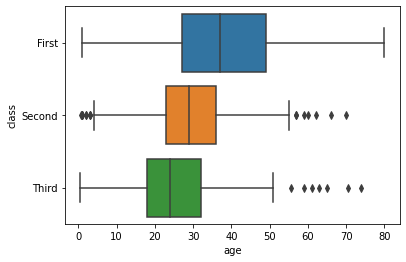

In [ ]:
import seaborn as sns
df = sns.load_dataset("titanic")
sns.boxplot(data=df, x="age", y="class")

# TASK: T3  <br> Selecting a hash function.
<p align="justify"><font face="Verdana" size='2'>
<ol>
<li>¿What do you say about the hash function selected in the following case? <br>
Suppose  U  = <em>{111,110,101, 011,101, 010, 100, 001}</em>. You pick the hash functions  $h_1 = ( 3 \times \text{LastDigit}(x_i)+1)\mod n $. <br> Is it a good choice? <br>
<a>Hint: </a> $\forall h \in H $, Probability  $ \bigl(h(x_i) = h(x_j) \bigr) ≤ 1/n $?
</li>
<li><a>The worst-case input can break a good function! </a> A router uses a hash function to address messages between $n$ channels.  A hacker stole the source code of the router program, the program has a fixed hash function. How can the hacker break the network (a denial-of-service attack)? Propose a solution for this threat. <br>
<a>Hint:</a>  The bad guy can’t break a hash function that he doesn’t yet know.</li>
<li><a>In $E[X]= 1 +  \frac {( n-1) } {n} \leq 2$ we could replace  2  with any constant.</a> <em>It would still be good. </em><br>A disk page is the basic unit per data transfer between memory and external storage. You create a table with one thousand rows and the database system can store 10 rows per page on disk. Define a hash function and propose a value for $n$. Consider the following scenario.   </li>
<ul> <font face="Verdana" size='2'>
<li>  The table has a numeric attribute named Id, that you will use as a hash function key.</li>
<li>You require search and insert  rows from/to your table
* We look for only one disk access when a user queries or  inserts one row in the table.</li>
<li>The table does not share pages on disk with other tables and you need to minimize disk access in full scan queries (queries over all rows).
<a>Hint: </a><b> Load Factor:</b> $\frac {Number-of -objects-in-hash-table} {Number-of-buckets-of- hash-table} $
</li>
</ul>
<li>Let suppose $U= \{(i,j)\}$ where $i,j = 1,...,5$. We define the following hash function family  $((a_1∗i \mid\mid a_2∗j) + b)\mod29$; where      $a \in \{ 1,2,...,28 \}$  and $b \in \{0,1,...,28  \} $ and  $\mid\mid$ is the concatenate operator.  Is this a good hash family? Why ? </li>
<li> Explain the following sentence: having $m=n$, <b>the query time</b> to find an specific key in the dictionary $D$    will be $\lt \frac {3 \ ln \ n}{ln \ ln\ n}$ with probability $ \ge (1 - \frac{1}{n})$.
</li>

</p>

# TASK: T4   -->  CODE
<p align="justify"><font face="Verdana" size='2'>

<b> <font color='0B5345'>4.1. Universal family of hash functions. Example.</b> </font> </br>

In [ ]:
!pip install primesieve==2.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.8/264.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for primesieve: filename=primesieve-2.3.0-cp310-cp310-linux_x86_64.whl size=2394405 sha256=3aca9069c1c58667695f90db586f186139e84ff4e90ea031ddb7ad6664a5d879
  Stored in directory: /root/.cache/pip/wheels/b4/ed/73/9fa15149adddf2abd212624bf38b1be05a50fb6a39ba9f5055
Successfully built primesieve


In [ ]:
import numpy as np
from primesieve import n_primes
import sys

def my_hash(addresses):
      # define number of buckets, # the first prime number greater than addresses
      buckets =  n_primes(1, int(addresses))[0]
      hash_table=np.zeros(buckets, dtype=int)
      # generate values for constants
      a=np.random.randint(1, int(buckets)-1, size=4)
      b=np.random.randint(0, int(buckets)-1, size=1)
      for i in range(int(addresses)):
           #  generate  random ip
           ip=np.random.randint(0, 255, size=4);
           pos = ((a[0]* ip[0] + a[1]* ip[1] +  a[2]* ip[2]+ a[3]* ip[3]) + b[0]) % buckets
           hash_table[pos] += 1;
      return buckets, a, b,hash_table

In [ ]:
# initialize hash_table in zeros.
addresses = input('Please enter the number of addresses to generate: ')
try:
   val = int(addresses)
except ValueError:
    print("No.. input string is not an Integer. It's a string")
    sys.exit("program is aborted....")

buckets,a,b,hash_table= my_hash(addresses)

print('hash function ' +  str(a[0]) + ' x_1 || ' +  str(a[1]) + ' x_2|| ' +  str(a[2]) + ' x_3 || '+ str(a[3])  + ' x_4 + ' + str(b[0]) + ' modulo(' + str(buckets)+')')
print ('hash_table  ' +str(hash_table))

Please enter the number of addresses to generate: 100
hash function 78 x_1 || 19 x_2|| 53 x_3 || 13 x_4 + 99 modulo(101)
hash_table  [1 2 0 1 1 1 2 1 0 0 0 0 1 0 0 0 2 1 0 2 0 0 1 2 0 1 3 2 0 0 1 2 1 0 0 1 1
 2 0 0 0 1 0 1 0 1 2 0 1 1 1 2 1 1 1 1 1 0 2 3 1 1 1 0 2 0 1 2 0 1 3 2 0 3
 0 1 3 0 1 0 0 1 0 1 1 1 0 5 1 1 4 3 1 0 1 1 1 3 0 1 0]


<b><font color='0B5345'>4.2. Built-in hash library </font></b>.

<p align="justify"><font face="Verdana" size="2.5"><b>MD5 </b>- (or message digest algorithm) produce a 128-bit hash value, it is  a well-known and well-crafted
hash function. This is built-in to most programming languages.</p>

In [ ]:
# Takes a string literal from the console, and hash this input. It encode the string in a sequence of bytes before hashing.
import hashlib
mystring = input('Enter String to hash: ')
# Assumes the default UTF-8
hash_object = hashlib.md5(mystring.encode())
# Hexdigest returns a HEX string representing the hash.
print(hash_object.hexdigest())

Enter String to hash: uweuiew
5e87b314a3e80e1e63e3778487a1e969


<b> <font color='0B5345'>4.3. Practical example: hashing passwords. Code from </font><a href="https://www.pythoncentral.io/hashing-strings-with-python/">here </a></b>

In [ ]:
import uuid
import hashlib

def hash_password(password):
    # uuid is used to generate a random number
    salt = uuid.uuid4().hex
    return hashlib.sha256(salt.encode() + password.encode()).hexdigest() + ':' + salt

def check_password(hashed_password, user_password):
    password, salt = hashed_password.split(':')
    return password == hashlib.sha256(salt.encode() + user_password.encode()).hexdigest()

new_pass = input('Please enter a password: ')
hashed_password = hash_password(new_pass)
print('The string to store in the db is: ' + hashed_password)
old_pass = input('Now please enter the password again to check: ')
if check_password(hashed_password, old_pass):
    print('You entered the right password')
else:
    print('I am sorry but the password does not match')

Please enter a password: camila
The string to store in the db is: 3aeb2bb6182f02fb32197eff09fee4597116332e9959df313b34c1c5e9f6a123:f39a2720413f44238ab0583f340f8e92
Now please enter the password again to check: camila
You entered the right password
